#### Business Analytics FHDW 2025
# Zweifaktorielle Varianzanalyse
## am erweiterten Beispiel von Schokolade

Wir erweitern das Szenario aus der einfaktoriellen ANOVA: Haben neben den Platzierungen auch die Verpackungsarten *Box* oder *Papier* Einfluss auf den Absatz? Bei drei Platzierungs- und zwei Verpackungsarten ergibt sich ein 3\*2-faktorielles Design des Experiments. Eine solche gleichzeitige Betrachtung der Faktoren statt der jeweils gesonderten Untersuchung hat den Vorteil, dass wir so auch die Wechselwirkungen (*Interaktionseffekte*) zwischen den Faktoren berücksichtigen und sich die nichterklärte Varianz verringern lässt.

In den 15 zufällig ausgewählten Märkten wird nun Schokolade sowohl in der Box als auch im Papier angeboten. Die resultierenden Zahlen lesen wir aus einer Beispieldatei ein.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as sta

schoko_df = pd.read_csv('Daten/anova_bsp_schoko_2.csv')
schoko_df

,Platzierung,Box,Papier
0,Süßwarenabteilung,47,40
1,Süßwarenabteilung,39,39
2,Süßwarenabteilung,40,35
3,Süßwarenabteilung,46,36
4,Süßwarenabteilung,45,37
5,Sonderplatzierung,68,59
6,Sonderplatzierung,65,57
7,Sonderplatzierung,63,54
8,Sonderplatzierung,59,56
9,Sonderplatzierung,67,53


### Modellformulierung und erste Berechnungen

Die *zweifaktorielle* Varianzanalyse bildet das Modell 

$y_{ghi}=\mu+\alpha_{g}+\beta_{h}+(\alpha\beta)_{gh}+\epsilon_{ghi}$ 

mit <br>
$y_{ghi}$ Beobachtungswert $i=1,...,5$ für Faktorstufen $g=1,2,3$ und $h=1, 2$<br>
$\mu$ Gesamtmittelwert in der Grundgesamtheit<br>
$\alpha_{g}$ wahrer Effekt von Platzierung $g$ <br>
$\beta_{h}$ wahrer Effekt von Verpackung $h$ <br>
$(\alpha\beta)_{gh}$ wahrer Interaktionseffekt der Faktoren $g$ und $h$<br>
$\epsilon_{ghi}$ Störgröße<br>

Wir berechnen zunächst die Haupteffekte in Form der Mittelwerte und ihrer Randmittelwerte:

In [2]:
schoko_df.index=schoko_df.Platzierung

mittelwerte_df = pd.DataFrame(columns=['Box','Papier','Randmittel', 'Wahrer Effekt'], 
                              index=['Süßwarenabteilung','Sonderplatzierung','Kassenplatzierung','Randmittel','Wahrer Effekt'])
#for p in set(schoko_df.index):
#        mittelwerte_df['Box'][p] = schoko_df['Box'][p].mean()
#        mittelwerte_df['Papier'][p] = schoko_df['Papier'][p].mean()
#        mittelwerte_df['Randmittel'][p] = (mittelwerte_df['Box'][p]+mittelwerte_df['Papier'][p])/2

for p in set(schoko_df.index):
        mittelwerte_df.loc[p, 'Box'] = schoko_df['Box'][p].mean()
        mittelwerte_df.loc[p, 'Papier'] = schoko_df['Papier'][p].mean()
        mittelwerte_df.loc[p, 'Randmittel'] = (mittelwerte_df['Box'][p]+mittelwerte_df['Papier'][p])/2


#mittelwerte_df['Box']['Randmittel'] = mittelwerte_df['Box'].mean()
#mittelwerte_df['Papier']['Randmittel'] = mittelwerte_df['Papier'].mean()
#mittelwerte_df['Randmittel']['Randmittel'] = (mittelwerte_df['Box']['Randmittel']
                                      #                    +mittelwerte_df['Papier']['Randmittel'])/2

mittelwerte_df.loc['Randmittel', 'Box'] = mittelwerte_df['Box'].mean()
mittelwerte_df.loc['Randmittel', 'Papier'] = mittelwerte_df['Papier'].mean()
mittelwerte_df.loc['Randmittel', 'Randmittel'] = (mittelwerte_df['Box']['Randmittel']
                                                          +mittelwerte_df['Papier']['Randmittel'])/2


mittelwerte_df['Wahrer Effekt'] = mittelwerte_df['Randmittel']-mittelwerte_df['Randmittel']['Randmittel']
mittelwerte_df.loc['Wahrer Effekt', 'Box'] = mittelwerte_df['Box']['Randmittel']-mittelwerte_df['Randmittel']['Randmittel']
mittelwerte_df.loc['Wahrer Effekt', 'Papier'] = mittelwerte_df['Papier']['Randmittel']-mittelwerte_df['Randmittel']['Randmittel']

#mittelwerte_df['Wahrer Effekt'] = mittelwerte_df['Randmittel']-mittelwerte_df['Randmittel']['Randmittel']
#mittelwerte_df['Box']['Wahrer Effekt'] = mittelwerte_df['Box']['Randmittel']-mittelwerte_df['Randmittel']['Randmittel']
#mittelwerte_df['Papier']['Wahrer Effekt'] = mittelwerte_df['Papier']['Randmittel']-mittelwerte_df['Randmittel']['Randmittel']


mittelwerte_df

,Box,Papier,Randmittel,Wahrer Effekt
Süßwarenabteilung,43.4,37.4,40.4,-10.1
Sonderplatzierung,64.4,55.8,60.1,9.6
Kassenplatzierung,52.2,49.8,51.0,0.5
Randmittel,53.333333,47.666667,50.5,0.0
Wahrer Effekt,2.833333,-2.833333,NaN,NaN


Zusätzlich können wir die Interaktionseffekte betrachten, bei denen die Stufen eines Faktors die Absatzmengen auf den Stufen eines anderen Faktors beeinflussen. Im Beispiel der Unterschied der durchschnittlichen Absatzmenge bei Sonderplatzierung und Kassenplatzierung in Box oder Papier:

In [3]:
print(mittelwerte_df.Box.Sonderplatzierung-mittelwerte_df.Papier.Sonderplatzierung)
print(mittelwerte_df.Box.Kassenplatzierung-mittelwerte_df.Papier.Kassenplatzierung)

8.600000000000009
2.4000000000000057


Aus diesem Unterschied folgt, dass die Art der Platzierung die Absätze der Verpackungstypen beeinflusst. Ansonsten wären die Unterschiede gleich groß.

Die Interaktionseffekte schätzen wir als

$(ab)_{gh} = \overline{y}_{gh} - \hat{y}_{gh}$

mit

$\overline{y}_{gh}$ der beobachtete interagierende Mittelwert der Faktorstufen $g$ und $h$<br>
$\hat{y}_{gh} = \overline{y}_{g.} + \overline{y}_{.h} - \overline{y}$ der Schätzwert für den Mittelwert der Faktorstufen $g$ und $h$ ohne Interaktion, berechnet aus den Gruppenmitteln und dem Gesamtmittelwert. Für $g=3$ und $h=2$ ist das z. B. 

In [4]:
gesamtmittel = mittelwerte_df.Randmittel.Randmittel
y_schaetz_ohne_interakt = mittelwerte_df.Randmittel.Kassenplatzierung + mittelwerte_df.Papier.Randmittel - gesamtmittel
y_schaetz_ohne_interakt

48.16666666666666

Das führt hier zu einem Interaktionseffekt $(ab)_{32}$ zwischen *Kassenplatzierung* und *Papierverpackung* von 

In [5]:
mittelwerte_df.Papier.Kassenplatzierung - y_schaetz_ohne_interakt

1.63333333333334

Durch die Interaktion ergibt sich hier ein höherer Absatz für die Schokolade in Papier, wenn sie an der Kasse angeboten wird.

Einen Eindruck über die Effekte der Interaktionen insgesamt bekommen wir aus der grafischen Darstellung der Faktorstufenmittelwerte in Abhängigkeit zu den Stufen eines anderen Faktors. Interaktionswirkung zeigt sich hier, wenn die Verbindungslinien zwischen den Mittelwerten *nicht parallel* verlaufen.

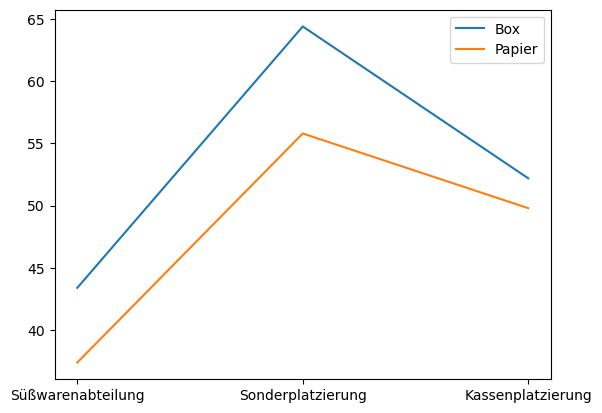

In [6]:
plt.xticks(ticks=[0,1,2], labels=['Süßwarenabteilung','Sonderplatzierung','Kassenplatzierung'])
plt.plot([mittelwerte_df.Box.Süßwarenabteilung, 
          mittelwerte_df.Box.Sonderplatzierung, mittelwerte_df.Box.Kassenplatzierung], label='Box')
plt.plot([mittelwerte_df.Papier.Süßwarenabteilung, mittelwerte_df.Papier.Sonderplatzierung, 
          mittelwerte_df.Papier.Kassenplatzierung], label='Papier')
plt.legend()
plt.show()

### Zerlegung der Streuung und Modellgüte

Die Gesamtstreuung teilt sich auch bei der zweifaktoriellen Varianzanalyse auf in die erklärte Streuung zwischen den Gruppen und die nicht erklärte Streuung innerhalb der Gruppen:

$SS_t = SS_b + SS_w$

Die erklärte Streuung setzt sich hier zusammen aus den einzelnen Faktorstreuungen und der Streuung durch Wechselwirkungen:

$SS_b = SS_A + SS_B + SS_{AxB}$

mit

$SS_A = H \cdot N \cdot \sum\limits_{g=1}^{G}{(\overline{y}_{g} - \overline{y})^2}$<br>
$SS_B = G \cdot N \cdot \sum\limits_{h=1}^{H}{(\overline{y}_{h} - \overline{y})^2}$<br>
$SS_{AxB} = N \cdot \sum\limits_{g=1}^{G}{\sum\limits_{h=1}^{H}{(\overline{y}_{gh} - \hat{y}_{gh})^2}}$

Die nicht erklärte Streuung kann weder auf die beiden Faktoren, noch auf deren Interaktionseffekte zurück geführt werden. Sie ist analog zur einfaktoriellen Variante definiert:

$SS_w = \sum\limits_{g=1}^{G}{\sum\limits_{h=1}^{H}{\sum\limits_{i=1}^{N}{(y_{ghi} - \overline{y}_{gh})^2}}}$

Die konkreten Werte ermitteln wir für die vorliegenden Daten:

In [7]:
G = 3 # Anzahl Platzierungen (Faktorstufen Faktor A)
H = 2 # Anzahl Verpackungen (Faktorstufen Faktor B)
N = 5 # Anzahl Elemente in Zelle (g, h)

faktor_A = ['Süßwarenabteilung','Sonderplatzierung','Kassenplatzierung']
faktor_B = ['Box', 'Papier']

SSA = H * N * np.sum([(mittelwerte_df.Randmittel[g]-gesamtmittel)**2 for g in faktor_A])
SSB = G * N * np.sum([(mittelwerte_df[h].Randmittel-gesamtmittel)**2 for h in faktor_B])
SSAxB = N * np.sum([np.sum([(mittelwerte_df[h][g]
                             -(mittelwerte_df[h].Randmittel+mittelwerte_df.Randmittel[g]-gesamtmittel))**2 
                            for h in faktor_B]) 
                    for g in faktor_A])
SSw = np.sum([np.sum([np.sum([(schoko_df[h][g][i]-mittelwerte_df[h][g])**2 for i in range(0,N)]) for h in faktor_B]) for g in faktor_A])
SSb = SSA + SSB + SSAxB
SSt = SSb + SSw

C:\Users\hartm\AppData\Local\Temp\ipykernel_23564\1507587500.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SSw = np.sum([np.sum([np.sum([(schoko_df[h][g][i]-mittelwerte_df[h][g])**2 for i in range(0,N)]) for h in faktor_B]) for g in faktor_A])


Die einzelnen Effekte stellen wir in einer Übersicht dar. Dazu berechnen wir das gesamte Eta-Quadrat und auch die *partiellen* Eta-Quadrate $EtaQuadrat_{faktor} = \frac{SS_{faktor}}{SS_{faktor}+SS_w}$ für eine erste Beurteilung der Modellgüte:

In [8]:
eta_quadrat = SSb/SSt
print("Eta-Quadrat = {:.4f}%, {:.4f}% bleiben unerklärt.".format(eta_quadrat,1-eta_quadrat))
partielle_eta_Q_df = pd.DataFrame({'Quelle': ['Platzierung', 'Verpackung', 'Interaktion'],
                                   'Quadrate (erklärt)': [SSA, SSB, SSAxB],
                                   'Fehler (unerklärt)': [SSw, SSw, SSw],
                                   'Gesamtabweichung': [SSA+SSw, SSB+SSw, SSAxB+SSw],
                                   'Partielles Eta-Quadrat': [SSA/(SSA+SSw),SSB/(SSB+SSw),SSAxB/(SSAxB+SSw)]})
partielle_eta_Q_df

Eta-Quadrat = 0.9037%, 0.0963% bleiben unerklärt.


,Quelle,Quadrate (erklärt),Fehler (unerklärt),Gesamtabweichung,Partielles Eta-Quadrat
0,Platzierung,1944.200000,238.0,2182.200000,0.890936
1,Verpackung,240.833333,238.0,478.833333,0.502959
2,Interaktion,48.466667,238.0,286.466667,0.169188


### Prüfung der statistischen Signifikanzen

Der Signifikanztest für das zweifaktorielle Modell entspricht als Quotient aus erklärter und nicht erklärter Varianz dem einfachen Modell, berücksichtigt aber unterschiedliche Freiheitsgrade:

$F_{emp} = \frac{SS_b/(G \cdot H-1)}{SS_w/(G \cdot H \cdot (N - 1))}=\frac{MS_b}{MS_w}$

Dazu setzen wir wieder die *ANOVA-Tabelle* zusammen.

In [9]:
df_A = G-1
df_B = H-1
df_AxB = (G-1)*(H-1)
df_w = G*H*(N-1)
df_t = G*H*N-1
df_b = G*H-1

MSb = SSb/df_b
MSw = SSw/df_w
F_emp = MSb/MSw

anova_df = pd.DataFrame({'Varianzquelle': ['Haupteffekte', 'Platzierung', 'Verpackung', 'Interaktion', 'Platzierung*Verpackung', 'Reststreuung', 'Total'],
                         'SS': ['-', SSA, SSB, '-', SSAxB, SSw, SSt],
                         'df': ['-', df_A, df_B, '-', df_AxB, df_w, df_t],
                         'MS': ['-', SSA/df_A, SSB/df_B, '-', SSAxB/df_AxB, SSw/df_w, SSt/df_t]})
anova_df

,Varianzquelle,SS,df,MS
0,Haupteffekte,-,-,-
1,Platzierung,1944.2,2,972.1
2,Verpackung,240.833333,1,240.833333
3,Interaktion,-,-,-
4,Platzierung*Verpackung,48.466667,2,24.233333
5,Reststreuung,238.0,24,9.916667
6,Total,2471.5,29,85.224138


Führen wir zunächst den zusammengefassten bzw. globalen Test durch.

Für $\alpha=0.05$ ermitteln wir den passenden Wert der F-Verteilung $F_\alpha$, den wir mit dem $F_{emp}$ von oben vergleichen:

In [10]:
F_alpha = sta.f.ppf(0.95, dfn=df_b, dfd=df_w)
p_value = (1 - sta.f.cdf(F_emp, dfn=df_b, dfd=df_w))
print('F_emp = {:.2f}\nF_alpha = {:.2f}\np = {}'.format(F_emp, F_alpha, p_value))

F_emp = 45.05
F_alpha = 2.62
p = 2.005651200676084e-11


Damit gilt wieder $F_{emp} > F_\alpha$ und wir verwerfen hier die Nullhypothese: Wir können also davon ausgehen, dass mindestens eine der Faktorstufen Einfluss auf den Absatz hat. Der dazugehörige $p$-Wert ist praktisch null.

Für das Konfidenzniveau von 95% betrachten wir nun auch noch die spezifischen F-Tests:

In [11]:
spez_F_tests = pd.DataFrame({'Varianzquelle': ['Platzierung', 'Verpackung', 'Interaktion'],
                             'df (Zähler)': [df_A, df_B, df_AxB],
                             'df (Nenner)': [df_w, df_w, df_w],
                             'F_alpha': [sta.f.ppf(0.95, dfn=df_A, dfd=df_w), 
                                         sta.f.ppf(0.95, dfn=df_B, dfd=df_w), 
                                         sta.f.ppf(0.95, dfn=df_AxB, dfd=df_w)],
                             'F_emp': [(SSA/df_A)/MSw, (SSB/df_B)/MSw, (SSAxB/df_AxB)/MSw]})
spez_F_tests

,Varianzquelle,df (Zähler),df (Nenner),F_alpha,F_emp
0,Platzierung,2,24,3.402826,98.026891
1,Verpackung,1,24,4.259677,24.285714
2,Interaktion,2,24,3.402826,2.443697


Hier sehen wir, dass für die beiden Faktoren die Nullhypothese verworfen werden kann, für die Interaktion aber nicht. Verpackung und Platzierung haben isoliert betrachtet jeweils eine Wirkung auf den Absatz, die *gemeinsame Wirkung* von Verpackung und Platzierung ist aber nicht signifikant.

## Aufgabe

Mit dem Datensatz *groessen_2.csv* beziehen wir nun auch das Geschlecht der Sportler/-innen mit ein. Führen Sie eine zweifaktorielle Varianzanalyse durch. Formen Sie den DataFrame dazu ggf. passend um.